# Part 2 Explanatory Analysis

## PROSPER LOAN ANALYSIS PRESENTATION

## by OKONKWO CHUKWUEBUKA MALCOM

.

### INVESTIGATION OVERVIEW

For this presentation I would like to share some the key insights I discovered while I was analyzing this dataset. The main purpose of the analysis was to find out the general perfromance of the Borrowers and to find out the group of Borrowers that are struggling with their loan  

### DATASET OVERVIEW

The dataset contains information of about 150K loaners in Prosper Loan. It has information concerning the loaners credit scores, loan status, employment status, occupation, amongst many other variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# to load the cleaned dataset from Exploratory Data Analysis
loancopy = pd.read_csv('prosperLoanData_cleaned.csv')

.

## Prosper Loan Explanatory Analysis

The main purpose of the analysis was to find out the general perfromance of the Borrowers and to find out the group of Borrowers that are struggling with their loan

## Distribution of the Borrowers per Term

There are 3 terms from the Dataset provided which are known by the number of months of the Loan. Term 12 which is for 12 months, Term 36 which is for 36 months and Term 60 which is for 60 months.

- 77.04% of the Borrowers are in the Term 36
- 21.54% of them are in Term 60 
- the remaining 1.42% are in Term 12

36    87778
60    24545
12     1614
Name: Term, dtype: int64


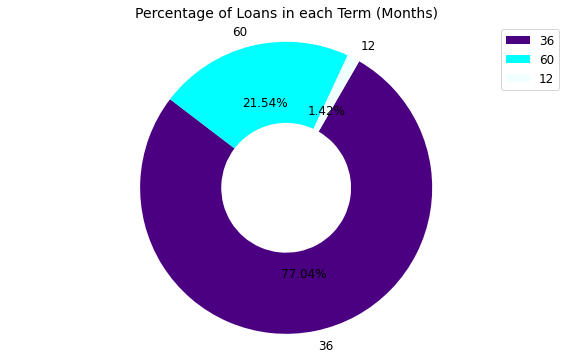

In [3]:
# first lets check the number of loan in each term
def pieplot(y):
    term_counts = loancopy[y].value_counts()
    print(term_counts)

    # to represent it in a pie plot
    plt.figure(figsize = (10,6))
    labels = term_counts.index
    plt.pie(term_counts, labels = labels, radius = 1.8, autopct = '%0.2f%%', colors = ['indigo', 'cyan', 'azure'],
            textprops = {'fontsize' : 12}, startangle= 60, counterclock= False, wedgeprops= {'width' : 1.0});
    plt.axis('equal')
    plt.legend(loc = 'upper right', fontsize = 12)
   
    
    
# to plot the pie plot
pieplot('Term')
plt.title('Percentage of Loans in each Term (Months)', fontsize = 14 )
plt.show();

## How does the Loan Amount relate with the Term and if the Borrowers are home Owners

Though over 75% of the Borrowers are in the Term 36, Term 60 still has the highest Loan amount requested on average. Across all terms, Home Owners request for larger loan amount than Borrowers who are not loan Owners

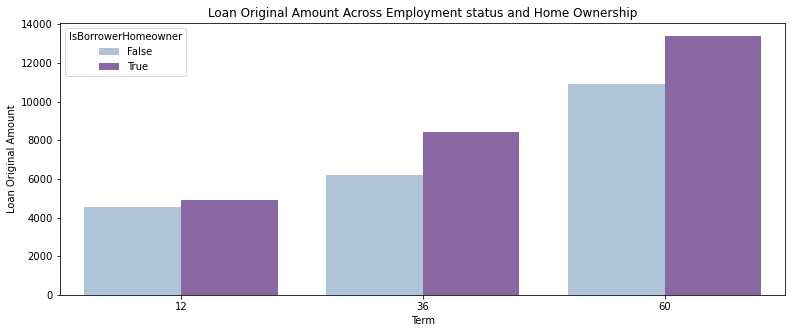

In [4]:
plt.figure(figsize=[13,5])
sns.barplot(data = loancopy, x = 'Term', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
            palette = 'BuPu',ci = None)
plt.title('Loan Original Amount Across Employment status and Home Ownership')
plt.ylabel('Loan Original Amount')
plt.show()

## The Current Loan Status overview

Over 5000 of the Borrowers are still on the current loan while close to 4000 of them have completed their loans. Alomst 500 of them have defaulted

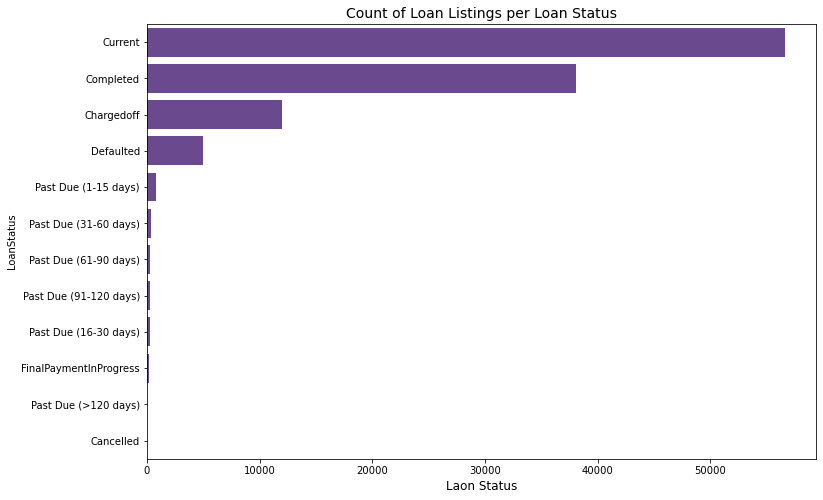

In [5]:
def countploty(y):
    plt.figure(figsize = [12,8])
    base_color = sns.color_palette("Paired")[9]
    sns.countplot(data=loancopy, y = y, color = base_color, order = loancopy[y].value_counts().index)

# to plot the count plot
countploty('LoanStatus')
plt.xlabel('Laon Status', fontsize = 12)
plt.title('Count of Loan Listings per Loan Status', fontsize = 14)
plt.show();

## What Year and Month of the Year have the highest Number of Loan request 

2013 recorded the year with the highest number of Loan requests. January is the month of the year with the highest number of the loan requests.

Text(0.5, 1.0, 'Number of Loan Listings per Month')

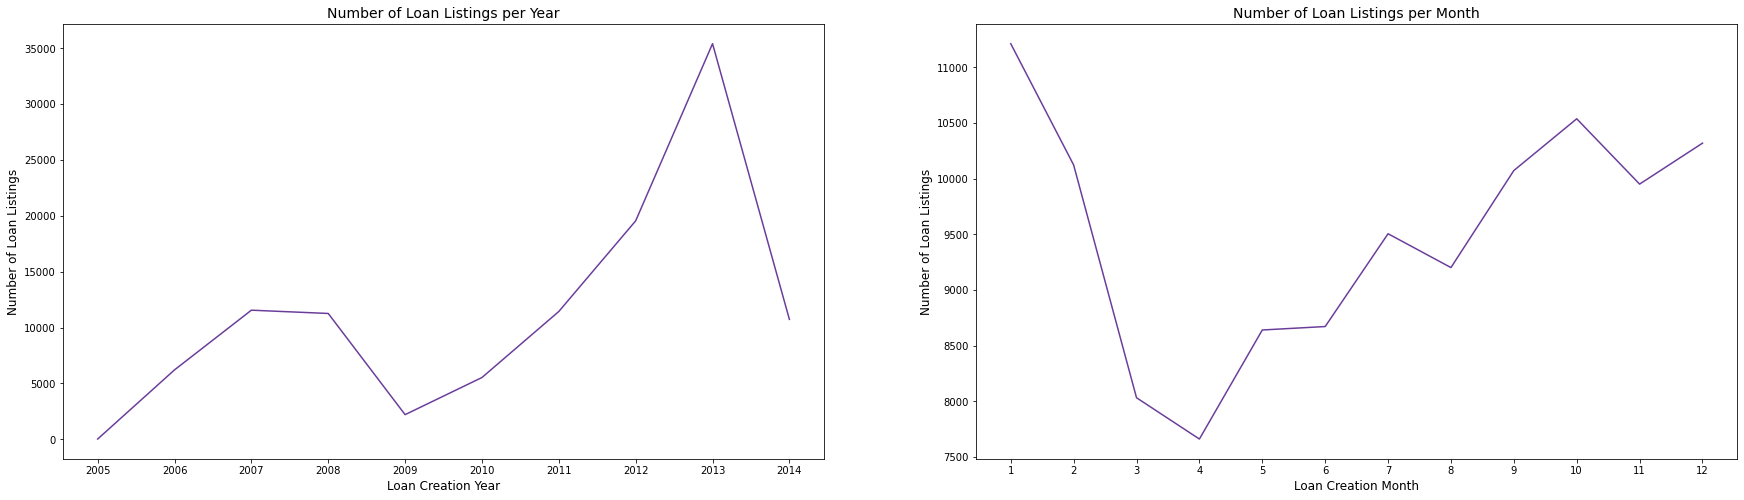

In [6]:
plt.figure(figsize= (30, 8))

plt.subplot(1,2,1)
# to group by the years 
year_grouped = loancopy['Year'].value_counts().sort_index()
base_color = sns.color_palette("Paired")[9]
sns.lineplot(x = year_grouped.index, y = year_grouped, color = base_color)
plt.xlabel('Loan Creation Year', fontsize = 12)
plt.ylabel('Number of Loan Listings', fontsize = 12)
plt.title('Number of Loan Listings per Year', fontsize = 14)
plt.xticks([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])



plt.subplot(1,2,2)
# to group by the years 
month_grouped = loancopy['Month'].value_counts().sort_index()
base_color = sns.color_palette("Paired")[9]
sns.lineplot(x = month_grouped.index, y = month_grouped, color = base_color)
plt.xlabel('Loan Creation Month', fontsize = 12)
plt.ylabel('Number of Loan Listings', fontsize = 12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Number of Loan Listings per Month', fontsize = 14)


## Does the Monthly Income of the Borrower Affect their Loan status

The monthly Income of the borrower might affect their Loan status. The Borrowers who have Defaulted, Charged off and Cancelled all have a low average monthly income. 

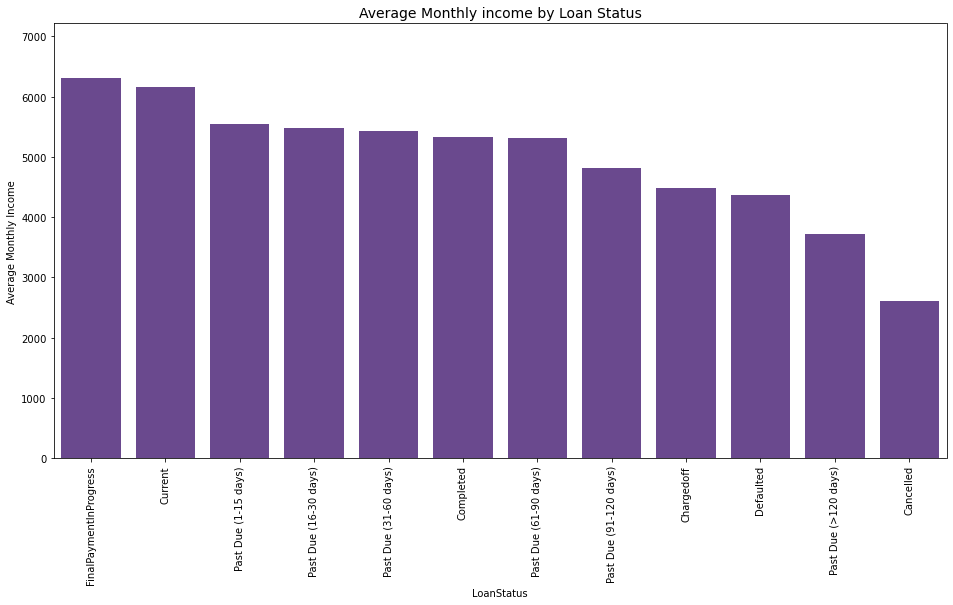

In [7]:
# the visualization
here = loancopy.groupby('LoanStatus')['StatedMonthlyIncome'].mean()
here = here.sort_values(ascending = False).index
plt.figure(figsize = [16, 8])
base_color = sns.color_palette("Paired")[9]
sns.barplot(data = loancopy, x = 'LoanStatus', y = 'StatedMonthlyIncome', color = base_color, errwidth = 0,
           order=here)
plt.ylabel("Average Monthly Income")
plt.title("Average Monthly income by Loan Status", fontsize = 14)
plt.xticks(rotation = 90);

## What is number of Borrowers across the Loan Status and Income range 

From the Loan status, there are more Borrowers in the Current Loan status but most of them are in the income range of $50000 - 74,999

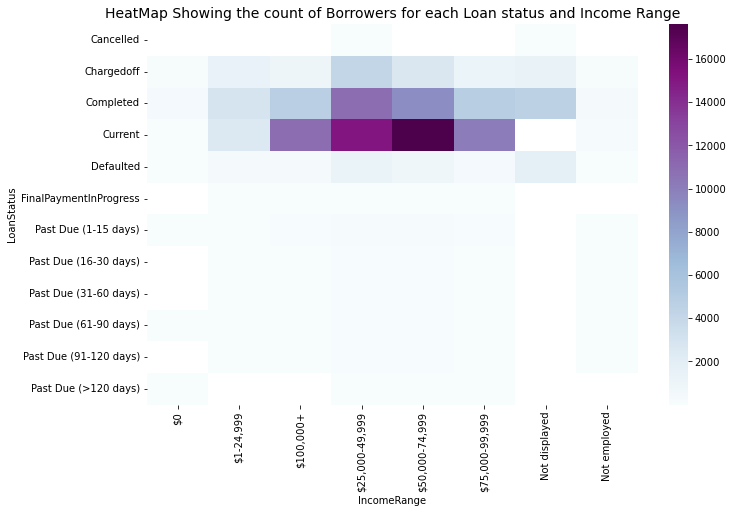

In [8]:
# visualization
plt.figure(figsize = (11,7))
score = loancopy.groupby(['LoanStatus', 'IncomeRange']).size()
score = score.reset_index(name = 'count')
score = score.pivot(index = 'LoanStatus', columns = 'IncomeRange', values = 'count')
sns.heatmap(score, cmap = 'BuPu')
plt.title('HeatMap Showing the count of Borrowers for each Loan status and Income Range', fontsize = 14);

## The Top Earning and Least Earning Occupation based on Monthly Income

The top Earning Occapation per month are Doctor, Attorney, Judge, Executive and Dentist. The least Earning Occupation are Students, Teacher, Waiter/Waitress, Nurses and Food Service.

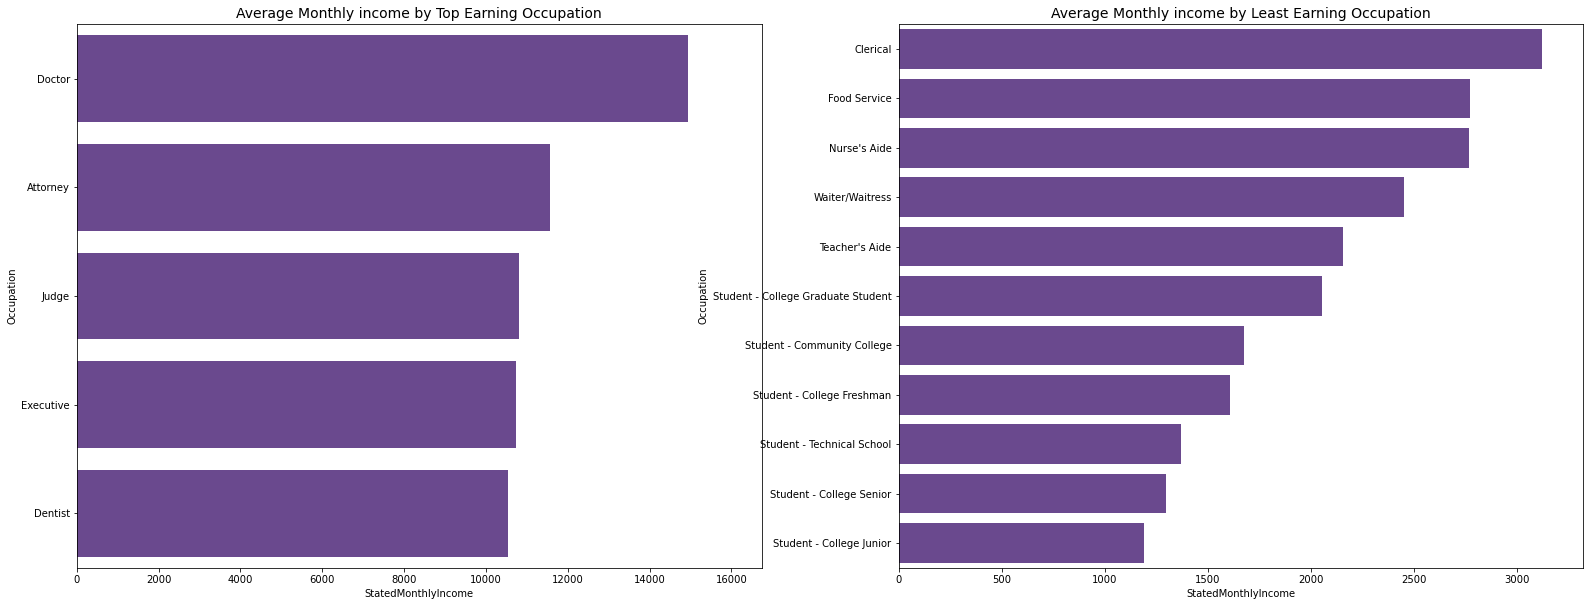

In [9]:
# the visualization
plt.figure(figsize = [27, 10])

plt.subplot(1,2,1)
Occupation = loancopy.groupby('Occupation')['StatedMonthlyIncome'].mean()
Occupation = Occupation.sort_values(ascending = False).index[0:5]
base_color = sns.color_palette("Paired")[9]
sns.barplot(data = loancopy, y = 'Occupation', x = 'StatedMonthlyIncome', color = base_color, errwidth = 0,
           order= Occupation)
plt.ylabel("Occupation")
plt.title("Average Monthly income by Top Earning Occupation", fontsize = 14)
plt.xticks(rotation = 0)

plt.subplot(1,2,2)
Occupation = loancopy.groupby('Occupation')['StatedMonthlyIncome'].mean()
Occupation = Occupation.sort_values(ascending = False).index[-12:-1]
base_color = sns.color_palette("Paired")[9]
sns.barplot(data = loancopy, y = 'Occupation', x = 'StatedMonthlyIncome', color = base_color, errwidth = 0,
           order= Occupation)
plt.ylabel("Occupation")
plt.title("Average Monthly income by Least Earning Occupation", fontsize = 14)
plt.xticks(rotation = 0);

## Who are struggling with their loan based on their Employment Status

According to [investopedia](https://www.investopedia.com/terms/d/dti.asp#:~:text=for%20a%20mortgage.-,Ideally%2C%20lenders%20prefer%20a%20debt%2Dto%2Dincome%20ratio%20lower,a%20mortgage%20or%20rent%20payment.), A general rule of thumb is to keep your overall debt-to-income ratio at or below 43%. Debt To Income ratio greater than 50% means that the borrower is not in a good place financially to take loan.

Using the benchmark of 50% for the Debt to Income ratio, we can see that all the borrowers in Term 60 and Term 12 do not exceed the benchmark which means that they are not struggling with their loan. In term 36, Borrowers that are Not Employed, Self Employed and Part time for their Employment status are the individuals who have thier average Debt to Income ratio above 0.5, therefore they mostly struggle with paying their loan

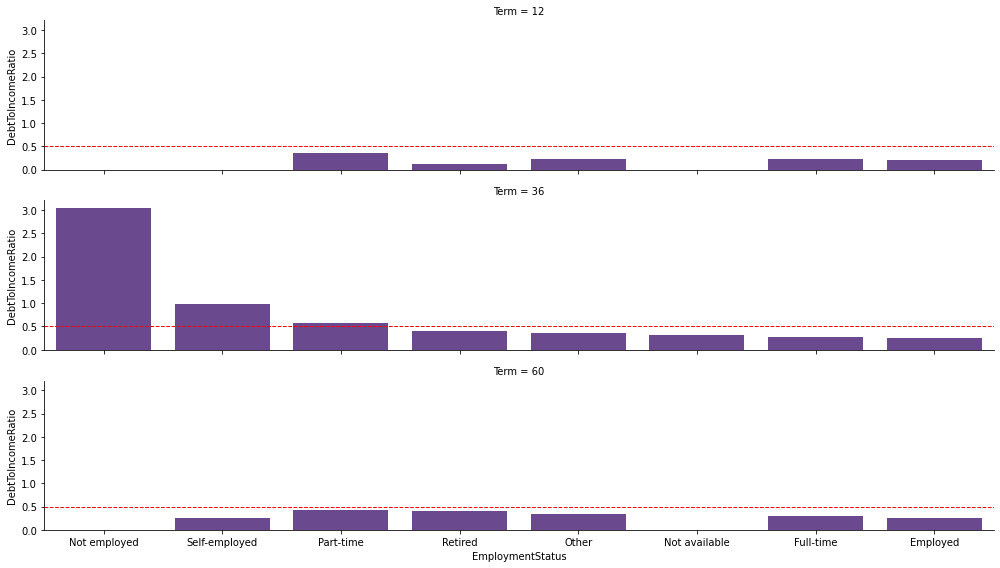

In [10]:
# visualization

base_color = sns.color_palette("Paired")[9]
loaned = loancopy.groupby('EmploymentStatus')['DebtToIncomeRatio'].mean().sort_values(ascending = False)
g = sns.catplot(x = 'EmploymentStatus', y = 'DebtToIncomeRatio', kind = 'bar', data = loancopy, ci = None, 
            order = loaned.index, color = base_color, height = 5, aspect = 3, row = 'Term')
g.fig.set_size_inches(14, 8);
g.refline(y = 0.5, color = "red", lw = 1)

## Who are struggling with their loan based on their Income Range

Using the benchmark of 50% for the Debt to Income ratio, The higher Debt to Income Ratio were observed for Borrowers that were Not Employed and Borrowers earning $1 - 24999. They are the group of Borrowers struggling with their loan

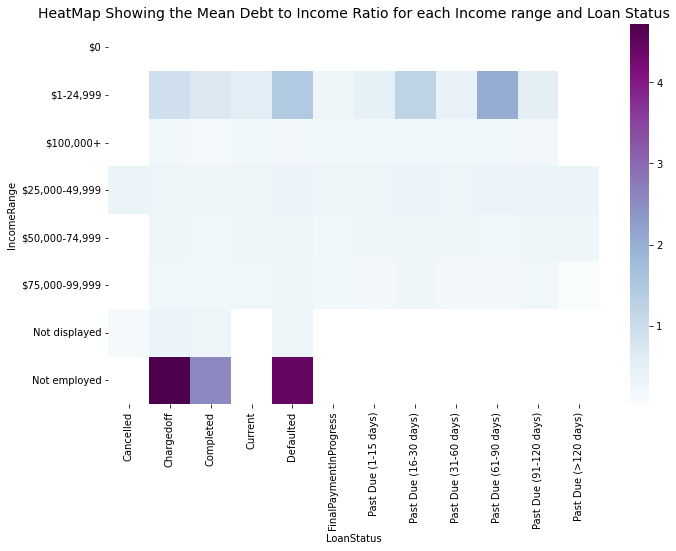

In [11]:
plt.figure(figsize = (11,7))
group = loancopy.groupby(['IncomeRange', 'LoanStatus'])['DebtToIncomeRatio'].mean()
group = group.reset_index(name = 'mean Debt to Income Ratio')
group = group.pivot(index = 'IncomeRange', columns = 'LoanStatus', values = 'mean Debt to Income Ratio')
sns.heatmap(group, cmap = 'BuPu')
plt.title('HeatMap Showing the Mean Debt to Income Ratio for each Income range and Loan Status', fontsize = 14);

## Conclusion

In Summary, The Borrowers struggling with their loan are the Unemployed and the Borrowers earning between $1 - 24,999

In [12]:
!jupyter nbconvert Project_III_Part_II_Explanatory.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Project_III_Part_II_Explanatory.ipynb to slides
[NbConvertApp] Writing 752689 bytes to Project_III_Part_II_Explanatory.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebook